In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time

% matplotlib inline

In [5]:
#parameters
dt = 0.6  #seconds
v_m = 0.12  #mm/s
v_s = 0.01  #std of speed
th_m = 0  #mean curving is zero
th_s = 32.3  #degrees/mm
th_cor = 12  #12 seconds helf-time

In [6]:
# initialize space-time

T = 10000
time = np.arange(0,T*dt,dt)
xs = np.zeros(time.shape)
ys = np.zeros(time.shape)  #2D location
ths = np.zeros(time.shape)  #agle with 1,0


In [72]:
def autocorr(x):
    result = np.correlate(x, x, 'full')
    result = result[int(result.size/2):]
    return result/result[0]

Text(0,0.5,'autocorr')

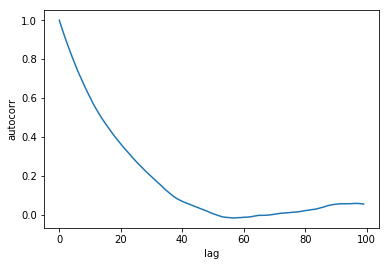

In [75]:
#plt.plot(np.arange(0,len(autocorr(ths))*dt,dt),autocorr(ths))
plt.plot(autocorr(ths)[0:100])
plt.xlabel('lag')
plt.ylabel('autocorr')

In [61]:
#without turning (OU-like tragectories)
for t in range(1,len(time)):
    vv = v_m + v_s*np.random.randn()
    xs[t] = xs[t-1] + vv*np.sin(ths[t]*np.pi/180) *dt
    ys[t] = ys[t-1] + vv*np.cos(ths[t]*np.pi/180) *dt
    ths[t] = ths[t-1] + ( - ths[t-1]/th_cor + th_m + th_s*(vv*dt)*np.random.randn()) *dt  #OU process?

In [76]:
np.var(ths)

20.777623492085834

In [ ]:
#with turning (switching-state)